In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st

In [20]:
#Read CSV file into dataframe
df_vehicles = pd.read_csv('vehicles_us.csv')

#Call info to be understand datatypes in dataframe:
# df_vehicles.info()
# df_vehicles.describe()
#Use transform function to add the median model year for each model to null values
model_median = df_vehicles.groupby('model')['model_year'].median()
df_vehicles['model_year'] = df_vehicles.groupby('model')['model_year'].transform(lambda x: x.fillna(model_median[x.name]))

#Check to see if the null values have been filled
df2 = df_vehicles['model_year'][df_vehicles['model_year'].isna()]
print(df2)

Series([], Name: model_year, dtype: float64)


Now, we will perform some EDA beginnning with checking for null values in certain columns and duplicated values.  A partiulcar focus will be made on the price and days_listed columns due to the fact that these contain the most useful information in assessing a particular vehicle. 

In [3]:
# Check for Duplicated Values and null values
vehicle_duplicates = df_vehicles[df_vehicles.duplicated]

#Empty dataframe is return, therefore there are no duplicates
print(vehicle_duplicates)

#Checking for null values in various columns:
price_null = df_vehicles[df_vehicles['price'].isnull()]
days_listed_null = df_vehicles[df_vehicles['days_listed'].isnull()]
model_year_null = df_vehicles[df_vehicles['model_year'].isnull()]
model_null = df_vehicles[df_vehicles['model'].isnull()]
cylinders_null = df_vehicles[df_vehicles['cylinders'].isnull()]




#In the model_year column, we have null values.  Without these values, we cannot accurately assess a cars values, as there are notable differences between years 
#These empty columns will be dropped:
print(price_null)
print(days_listed_null)
print(model_year_null)
print(cylinders_null)

df_vehicles = df_vehicles.dropna(subset=['model_year'])




Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []
       price  model_year                       model  condition  cylinders  \
1      25500         NaN                  ford f-150       good        6.0   
20      6990         NaN             chevrolet tahoe  excellent        8.0   
65     12800         NaN                  ford f-150  excellent        6.0   
69      7800         NaN                  ford f-150   like new        8.0   
72      3650         NaN              subaru impreza  excellent        NaN   
...      ...         ...       

In [4]:
#Change data types to be more descriptive of the column:
df_vehicles['model_year'] = df_vehicles['model_year'].astype(int)
# df_vehicles['is_4wd'] = df_vehicles['is_4wd'].astype()

df_null = df_vehicles['is_4wd'][df_vehicles['is_4wd'].isnull()]
not_null = df_vehicles['is_4wd'][df_vehicles['is_4wd'] == 1.0]



"""
The sum of the null values plus the sum of those equal to 1.0 is the same as the total amount.  
Thus, the null values could better represented by the number 0 and type int.
"""
df_vehicles['is_4wd'] = df_vehicles['is_4wd'].fillna(0)
df_vehicles['is_4wd'] = df_vehicles['is_4wd'].astype(int)




#Now change date_posted to date_time data type

df_vehicles['date_posted'] = pd.to_datetime(df_vehicles['date_posted'])

#Process other values:
df_vehicles['cylinders'] = df_vehicles['cylinders'].fillna(0)
df_vehicles['cylinders'] = df_vehicles['cylinders'].astype(int)
df_vehicles['paint_color'] = df_vehicles['paint_color'].fillna('unknown')



C:\Users\blwor\AppData\Local\Temp\ipykernel_34288\1622811336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles['model_year'] = df_vehicles['model_year'].astype(int)
C:\Users\blwor\AppData\Local\Temp\ipykernel_34288\1622811336.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles['is_4wd'] = df_vehicles['is_4wd'].fillna(0)
C:\Users\blwor\AppData\Local\Temp\ipykernel_34288\1622811336.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

            model         price
0           acura   6503.968326
1             bmw  10909.439024
2           buick  11619.428016
3        cadillac  17813.080420
4       chevrolet  14773.752516
5        chrysler   8261.826031
6           dodge   8289.157703
7            ford  13371.915815
8             gmc  16255.054301
9           honda   7635.220771
10        hyundai   7341.100548
11           jeep  13739.124584
12            kia   8633.176471
13  mercedes-benz  34900.000000
14         nissan   9380.017802
15            ram  19143.629861
16         subaru   9061.698934
17         toyota  10531.105018
18     volkswagen   7344.223767


C:\Users\blwor\AppData\Local\Temp\ipykernel_34288\1153858610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles['model'] = df_vehicles['model'].astype(str)
C:\Users\blwor\AppData\Local\Temp\ipykernel_34288\1153858610.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles['model'] = df_vehicles['model'].str.split().str[0]


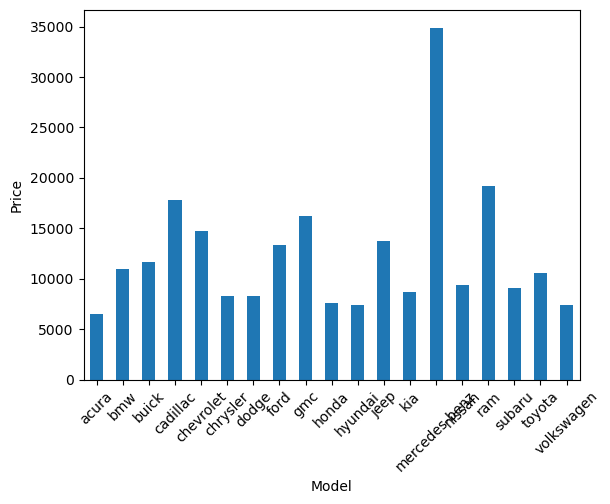

34900.0
6503.968325791855
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []
   condition         price
0  excellent  12982.834219
1       fair   3870.319920
2       good  11439.673455
3   like new  16838.928222
4        new  26268.351562
5    salvage   5160.897436


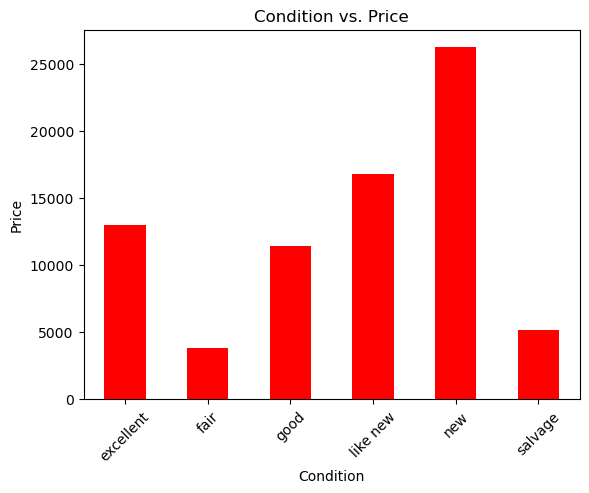

In [5]:
"""
Many of the years are rather old and don't appear accurate. 
For example, the F150 does not go back to the early 1900s.
Let's filter for years newer than 2000 to determine the 
average price per model.
"""
#Select for make and find avg price per make:
df_vehicles['model'] = df_vehicles['model'].astype(str)
df_vehicles['model'] = df_vehicles['model'].str.split().str[0]
df_vehicles_post2000 = df_vehicles[df_vehicles['model_year'] > 2000]
avg_price_model = df_vehicles_post2000.groupby(['model'])['price'].mean().reset_index()

print(avg_price_model)


avg_price_model.plot(
    kind='bar',
    x='model',
    y='price',
    xlabel='Model',
    ylabel='Price',
    legend=None
)

plt.xticks(rotation=45)
plt.show()


#Find vehicle after 2000 with highest and lowest average price:
max_price = max(avg_price_model['price'])
low_price = min(avg_price_model['price'])

print(max_price)
print(low_price)

#Provide a bar graph based on condition of Vehicle:
#First check for null values: 
condition_null  = df_vehicles[df_vehicles['condition'].isnull()]
print(condition_null)

#No nulls present.  Now we will graph according to condition vs avg price:

avg_price_condition  = df_vehicles_post2000.groupby(['condition'])['price'].mean().reset_index()

print(avg_price_condition)

avg_price_condition.plot(
    kind= 'bar',
    x = 'condition',
    y = 'price',
    xlabel='Condition',
    ylabel='Price',
    title = 'Condition vs. Price',
    color='red',
    legend = None   
)

plt.xticks(rotation=45)
plt.show()




In [8]:
print(df_vehicles['type'].unique())


#Here is the scatterplot using plotly
# NaN values under Odometer do not serve us for these purposes, so values must be dropped:
# Price has too large of a range as well and serves to obscure nuances in values:


df_vehicles['price'] = df_vehicles['price'][df_vehicles['price'] < 30000]

df_vehicles['odometer'] = df_vehicles['odometer'].dropna()

show_hist = st.checkbox("Show Histogram", value=True)
show_scatterplot = st.checkbox("Show Scatterplot", value=True)

if show_hist:
#Here is the histogram showing the amount of days listed per vehicle type:
    fig = px.histogram(
    df_vehicles,
    x = 'days_listed',
    color = 'type'
    )
    
    st.plotly_chart(fig)

if show_scatterplot:
    fig1 = px.scatter(df_vehicles, x="model_year", y="odometer", color='price')
    st.plotly_chart(fig1)




C:\Users\blwor\AppData\Local\Temp\ipykernel_34288\3648212653.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\blwor\AppData\Local\Temp\ipykernel_34288\3648212653.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2024-11-07 10:17:37.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-07 10:17:37.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-07 10:17:37.670 Thread 'M

['SUV' 'sedan' 'pickup' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


2024-11-07 10:17:38.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-07 10:17:38.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-07 10:17:38.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-07 10:17:38.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
